In [1]:
import math
import pandas as pd
from plotnine import *

data_file = "~/Documents/ogle/ogle4/smc/RRab.csv"
data = pd.read_csv(data_file).dropna()

PERIOD = "period"
LOGP = "logP"
AMPLITUDE = "amplitude_Iband"
PHI31 = "phi31"
METALICITY = "metalicity_jk_I"

data[LOGP] = data[PERIOD].map(math.log)

data.describe()

/home/chris/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


magnitude_Iband  magnitude_Vband       period  period_uncertainty  \
count      4748.000000      4748.000000  4748.000000        4.748000e+03   
mean         18.839039        19.415382     0.596560        2.803875e-06   
std           0.906234         0.915491     0.057343        3.421723e-06   
min          12.048000        12.632000     0.374290        1.000000e-07   
25%          18.918000        19.489000     0.561476        1.200000e-06   
50%          19.062000        19.637000     0.596877        2.000000e-06   
75%          19.182250        19.760000     0.630260        3.300000e-06   
max          20.419000        21.303000     0.975487        1.065000e-04   

       time_max_bright  amplitude_Iband          R21        phi21  \
count      4748.000000      4748.000000  4748.000000  4748.000000   
mean       6000.297409         0.504458     0.419089     4.294047   
std           0.175088         0.153931     0.060421     0.189534   
min        6000.000020         0.025000     0.125000     3.206000   
25%        6000.148912         0.393000     0.382000     4.163750   
50%        6000.294415         0.497000     0.421000     4.266000   
75%        6000.442110         0.612000     0.458000     4.400000   
max        6000.920100         1.053000     0.654000     5.161000   

               R31        phi31         logP  
count  4748.000000  4748.000000  4748.000000  
mean      0.297968     2.460209    -0.521185  
std       0.070244     0.423121     0.096209  
min       0.024000     0.395000    -0.982725  
25%       0.255000     2.158000    -0.577186  
50%       0.310000     2.403000    -0.516044  
75%       0.351000     2.714000    -0.461622  
max       0.589000     5.795000    -0.024818

In [2]:
def get_jk_I_metalicity(row):
    """
    D.M. Skowron 2016
    """
    period = row[PERIOD]
    phi31 = row[PHI31]
    
    metalicity = 2.132 - 5.394 * period - 1.009 * phi31 + 0.164 * (phi31 ** 2)
    return metalicity

In [3]:
"""from sklearn.svm import OneClassSVM

X = data.as_matrix([PERIOD, AMPLITUDE, PHI31])

outlier_removal = OneClassSVM()
outlier_removal.fit(X)
data["is_outlier"] = outlier_removal.predict(X)"""

from sklearn.ensemble import IsolationForest

X = data.as_matrix([PERIOD, AMPLITUDE, PHI31])

outlier_removal = IsolationForest(random_state = 1)
outlier_removal.fit(X)
data["is_outlier"] = outlier_removal.predict(X)

data_clean = data[data["is_outlier"] == 1.0]

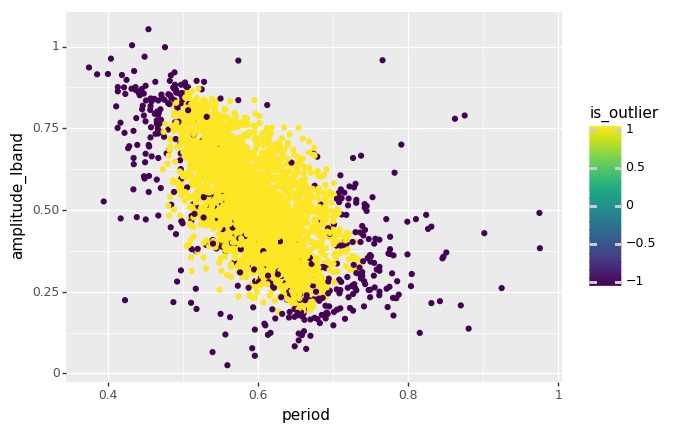

<ggplot: (-9223363249769799431)>

In [4]:
ggplot(data, aes(x = PERIOD, y = AMPLITUDE, color = "is_outlier")) + geom_point()

In [5]:
data_clean[METALICITY] = data_clean.apply(get_jk_I_metalicity, axis=1)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


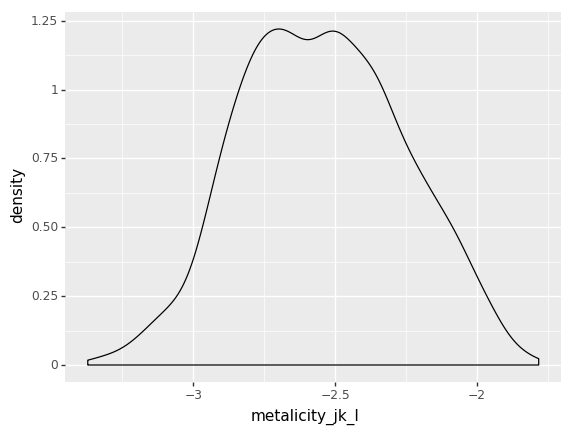

<ggplot: (8787082176744)>

In [6]:
ggplot(data_clean, aes(x = METALICITY)) + geom_density()

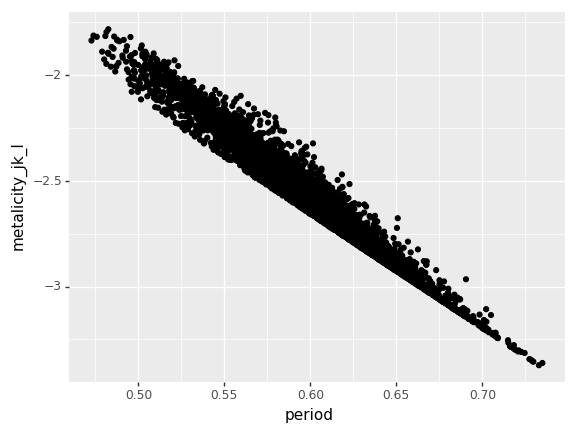

<ggplot: (-9223363249780570957)>

In [7]:
ggplot(data_clean, aes(x = PERIOD, y = METALICITY)) + geom_point()

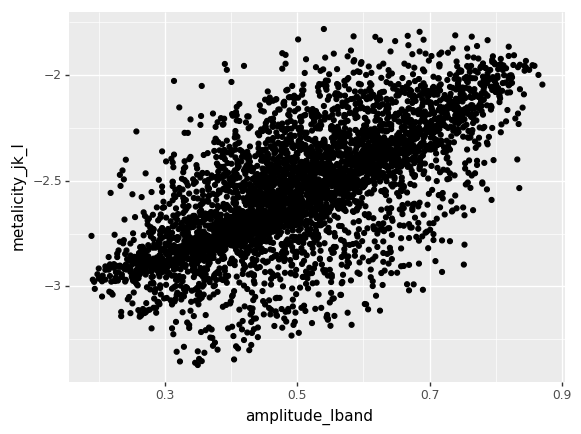

<ggplot: (-9223363249780581600)>

In [8]:
ggplot(data_clean, aes(x = AMPLITUDE, y = METALICITY)) + geom_point()

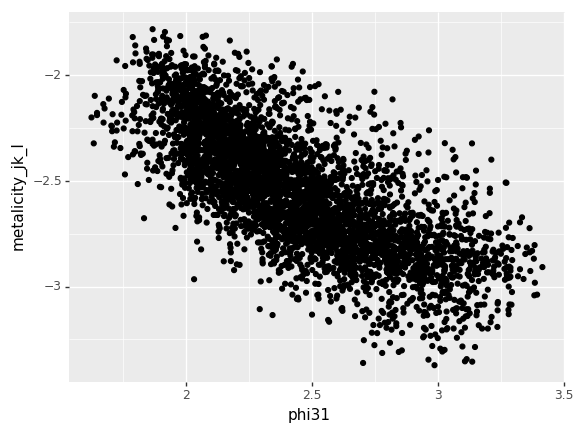

<ggplot: (-9223363249780639712)>

In [9]:
ggplot(data_clean, aes(x = PHI31, y = METALICITY)) + geom_point()

In [10]:
#from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

#X = data_clean.as_matrix([PERIOD, AMPLITUDE, PHI31, METALICITY])
#X = preprocessing.scale(X)
X = data_clean.as_matrix([LOGP, AMPLITUDE])
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
#X = preprocessing.scale(X)

clustering_kmeans = KMeans(n_clusters = 10, random_state = 1)
clusters = clustering_kmeans.fit_predict(X)

#clustering_dbscan = DBSCAN()
#clusters = clustering_dbscan.fit_predict(X)

#clustering_agg = AgglomerativeClustering()
#clusters = clustering_agg.fit_predict(X)

In [11]:
data_clean["cluster"] = clusters

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


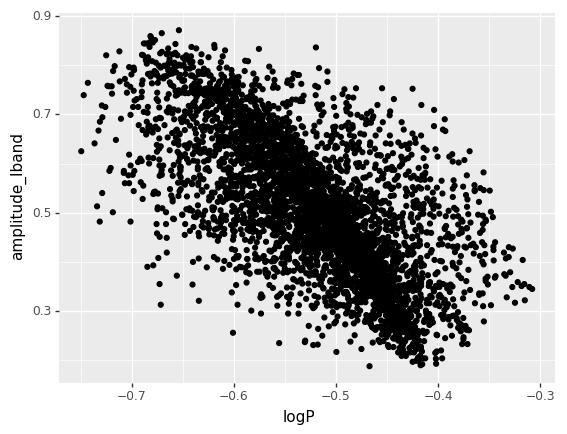

<ggplot: (-9223363249780733664)>

In [12]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE)) + geom_point()

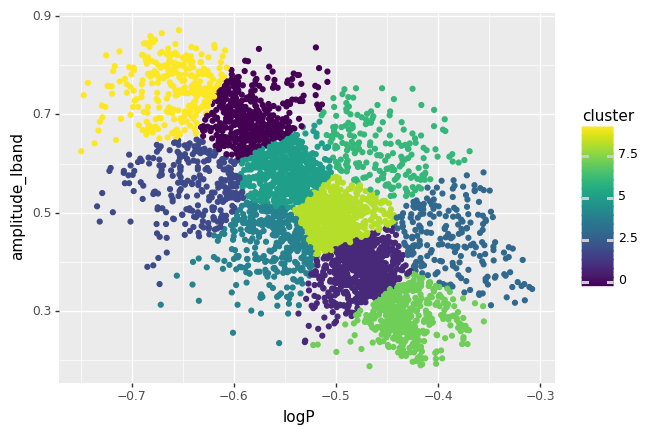

<ggplot: (-9223363249780679827)>

In [13]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE, color = "cluster")) + geom_point()

In [14]:
data_clean["is_oost_II"] = data_clean["cluster"].map(lambda c: c == 3 or c == 6)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


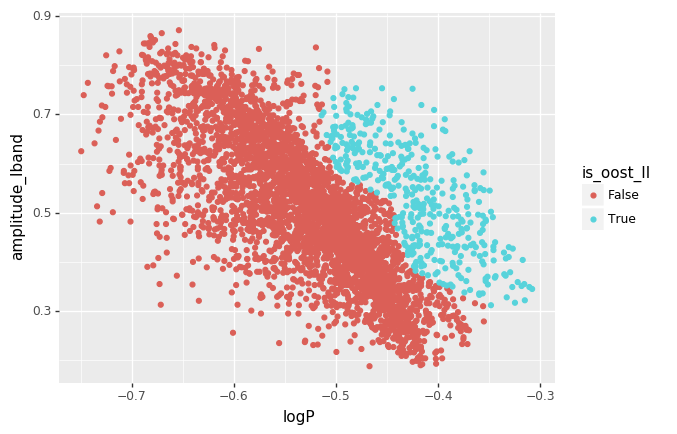

<ggplot: (8787071246021)>

In [15]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE, color = "is_oost_II")) + geom_point()

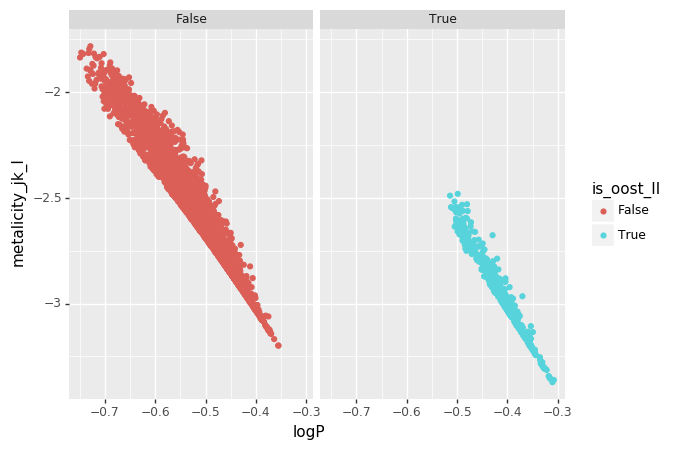

<ggplot: (8787074107291)>

In [16]:
ggplot(data_clean, aes(x = LOGP, y = METALICITY, color = "is_oost_II")) +\
    facet_wrap("~is_oost_II") +\
    geom_point()

In [17]:
X2 = data.as_matrix([LOGP, AMPLITUDE])
X2 = scaler.transform(X2)

data["cluster"] = clustering_kmeans.predict(X2)
data["is_oost_II"] = data["cluster"].map(lambda c: c == 6 or c == 7)

In [18]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode()

oostII = go.Scatter3d(
    x=data_clean[data_clean["is_oost_II"] == True][LOGP],
    y=data_clean[data_clean["is_oost_II"] == True][AMPLITUDE],
    z=data_clean[data_clean["is_oost_II"] == True][PHI31],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

other = go.Scatter3d(
    x=data_clean[data_clean["is_oost_II"] == False][LOGP],
    y=data_clean[data_clean["is_oost_II"] == False][AMPLITUDE],
    z=data_clean[data_clean["is_oost_II"] == False][PHI31],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

parts = [other, oostII]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=go.Scene(
        xaxis=go.XAxis(title='Log Period'),
        yaxis=go.YAxis(title='Amplitude I band'),
        zaxis=go.ZAxis(title='phi31')
    )
)
fig = go.Figure(data=parts, layout=layout)
py.offline.iplot(fig, filename='simple-3d-scatter')

In [19]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state = 1)
svc.fit(X, data_clean.as_matrix(["is_oost_II"]))

/home/chris/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0)

In [20]:
data_clean["is_oost_II_linear"] = svc.predict(X)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



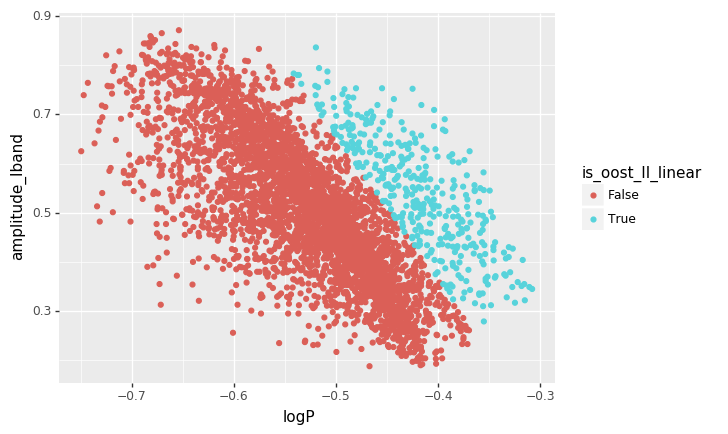

<ggplot: (8787074190284)>

In [21]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE, color = "is_oost_II_linear")) + geom_point()

In [22]:
print("Means: %s" % scaler.mean_)
print("Deviations: %s" % scaler.scale_)
logp_mean = scaler.mean_[0]
logp_sc = scaler.scale_[0]
amp_mean = scaler.mean_[1]
amp_sc = scaler.scale_[1]

Means: [-0.52136977  0.50733957]
Deviations: [ 0.07558294  0.13965589]


In [23]:
def term(parts):
    print("x_%d = (%s - (%f)) / %f" % parts)
    
term((1, "log(period)", logp_mean, logp_sc))
term((2, "amplitude_I", amp_mean, amp_sc))

print("y = %f + (%f * %s) + (%f * %s)" % (svc.intercept_, svc.coef_[0][0], "x_1", svc.coef_[0][1], "x_2"))

x_1 = (log(period) - (-0.521370)) / 0.075583
x_2 = (amplitude_I - (0.507340)) / 0.139656
y = -2.604320 + (2.751891 * x_1) + (1.781723 * x_2)


In [87]:
import numpy as np
import itertools

xs = np.arange(data_clean[LOGP].min(), data_clean[LOGP].max(), 0.005)
ys = np.arange(data_clean[AMPLITUDE].min(), data_clean[AMPLITUDE].max(), 0.01)
line = list(itertools.product(xs, ys))
line = pd.DataFrame(line, columns = [LOGP, AMPLITUDE])

In [88]:
X4 = scaler.transform(line.as_matrix([LOGP, AMPLITUDE]))

line["is_oost_II_linear"] = svc.predict(X4)

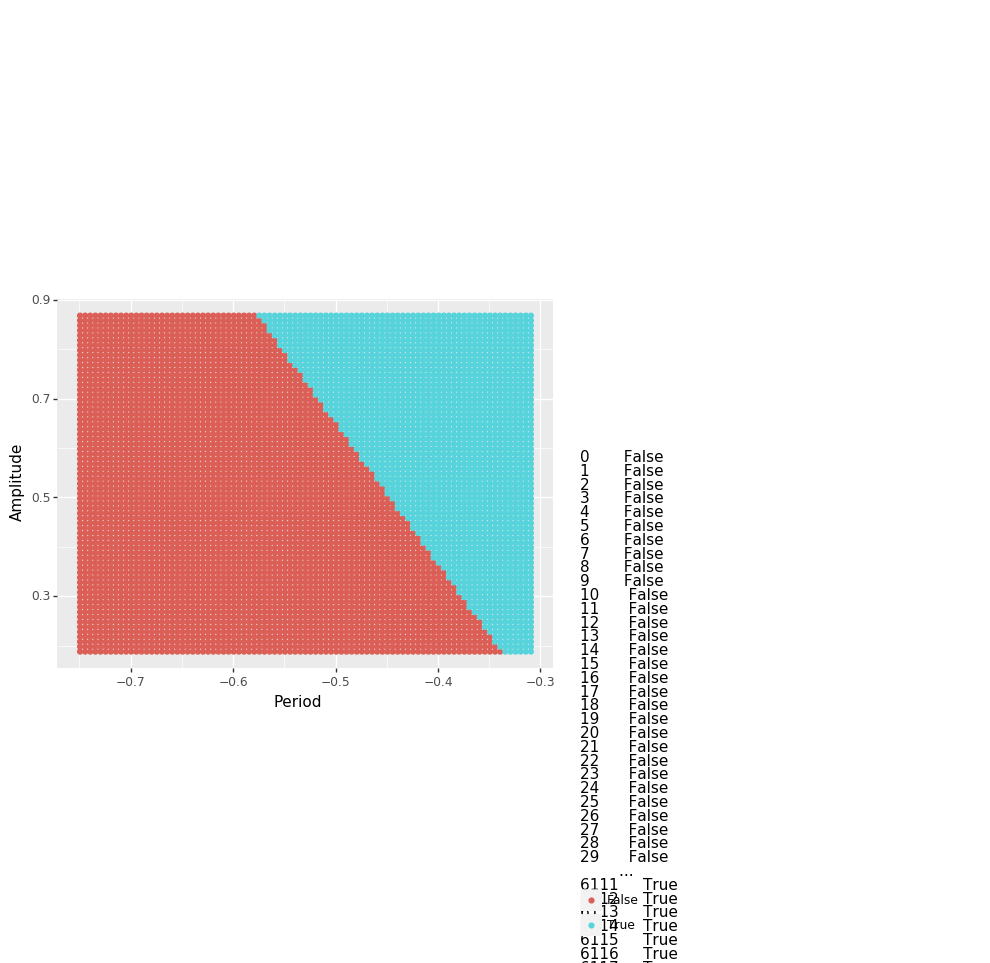

<ggplot: (-9223363249788937016)>

In [89]:
ggplot(line) +\
    geom_point(aes(x = line[LOGP], y = line[AMPLITUDE], color = line["is_oost_II_linear"])) +\
    xlab("Period") +\
    ylab("Amplitude")

In [90]:
def f(row):
    logp = row[LOGP]
    amp = row[AMPLITUDE]
    
    x_1 = (logp - (-0.521370)) / 0.075583
    x_2 = (amp - (0.507340)) / 0.139656
    
    #value = -2.589064 + (2.584727 * x_1) + (1.816317 * x_2)
    
    #return value >= 0
    return svc.predict([[x_1,x_2]])[0]

In [91]:
line["is_oost_II_linear_2"] = line.apply(f, axis=1)

In [92]:
from sklearn.metrics import confusion_matrix

confusion_matrix(line["is_oost_II_linear"], line["is_oost_II_linear_2"])

array([[4068,    0],
       [   0, 2073]])

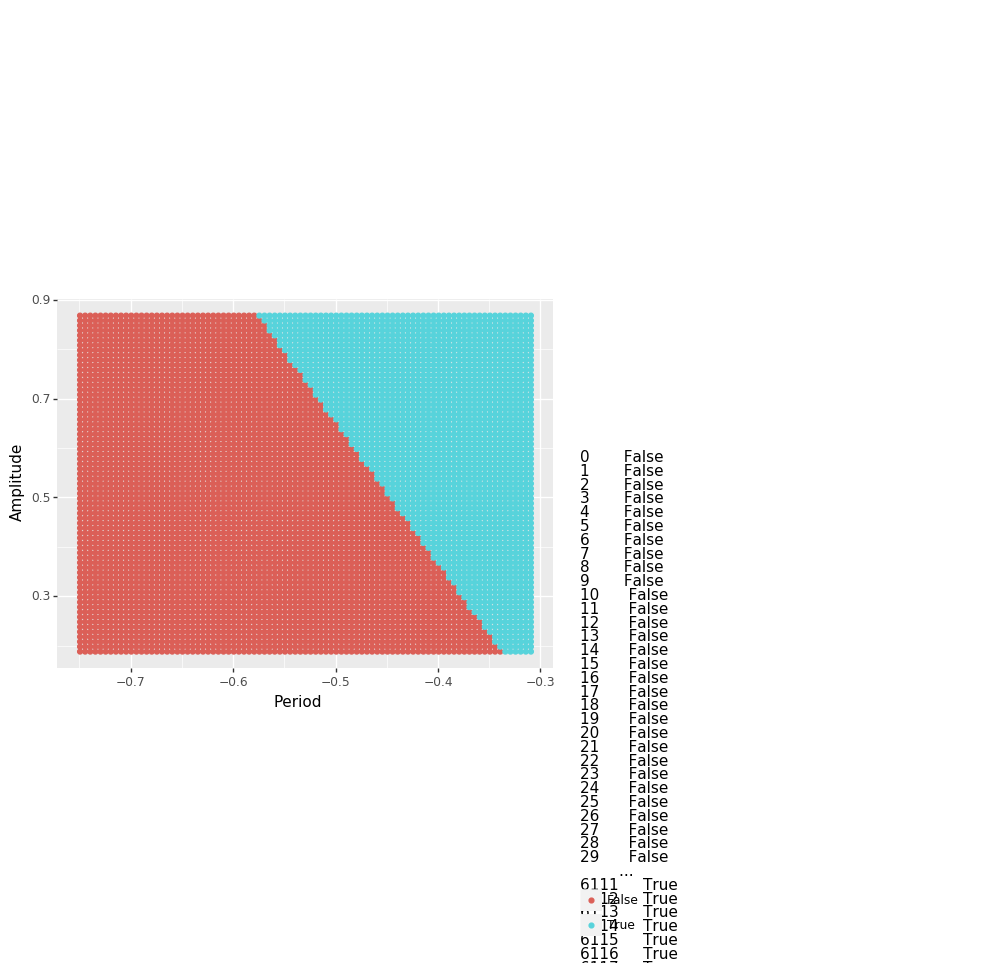

<ggplot: (-9223363249788614000)>

In [93]:
ggplot(line) +\
    geom_point(aes(x = line[LOGP], y = line[AMPLITUDE], color = line["is_oost_II_linear_2"])) +\
    xlab("Period") +\
    ylab("Amplitude")

In [94]:
def scale_logp(logp):
    return (logp - (-0.521370)) / 0.075583

def scale_amp(amp):
    return (amp - (0.507340)) / 0.139656

In [95]:
line["scale_logp"] = line[LOGP].map(scale_logp)
line["scale_amp"] = line[AMPLITUDE].map(scale_amp)

In [96]:
X5 = line.as_matrix([LOGP, AMPLITUDE])
line["scale_logp_2"] = [r[0] for r in list(scaler.transform(X5))]
line["scale_amp_2"] = [r[1] for r in list(scaler.transform(X5))]

In [148]:
def f2(row):
    logp = row[LOGP]
    amp = row[AMPLITUDE]
    
    x_1 = (logp - (-0.521370)) / 0.075583
    x_2 = (amp - (0.507340)) / 0.139656
    
    #value = -2.589064 + (2.584727 * x_1) + (1.816317 * x_2)
    #value = -2.604320 + (2.751891 * logp) + (1.781723 * amp)
    value = svc.intercept_[0] + (svc.coef_[0][0] * logp) + (svc.coef_[0][1] * amp)
    
    return value

In [149]:
line["result"] = line.apply(f2, axis=1)

In [150]:
line["result_actual"] = svc.decision_function(line.as_matrix(["scale_logp", "scale_amp"]))

In [151]:
line

logP  amplitude_Iband  is_oost_II_linear  is_oost_II_linear_2  \
0    -0.749302            0.188              False                False   
1    -0.749302            0.198              False                False   
2    -0.749302            0.208              False                False   
3    -0.749302            0.218              False                False   
4    -0.749302            0.228              False                False   
5    -0.749302            0.238              False                False   
6    -0.749302            0.248              False                False   
7    -0.749302            0.258              False                False   
8    -0.749302            0.268              False                False   
9    -0.749302            0.278              False                False   
10   -0.749302            0.288              False                False   
11   -0.749302            0.298              False                False   
12   -0.749302            0.308              False                False   
13   -0.749302            0.318              False                False   
14   -0.749302            0.328              False                False   
15   -0.749302            0.338              False                False   
16   -0.749302            0.348              False                False   
17   -0.749302            0.358              False                False   
18   -0.749302            0.368              False                False   
19   -0.749302            0.378              False                False   
20   -0.749302            0.388              False                False   
21   -0.749302            0.398              False                False   
22   -0.749302            0.408              False                False   
23   -0.749302            0.418              False                False   
24   -0.749302            0.428              False                False   
25   -0.749302            0.438              False                False   
26   -0.749302            0.448              False                False   
27   -0.749302            0.458              False                False   
28   -0.749302            0.468              False                False   
29   -0.749302            0.478              False                False   
...        ...              ...                ...                  ...   
6111 -0.309302            0.578               True                 True   
6112 -0.309302            0.588               True                 True   
6113 -0.309302            0.598               True                 True   
6114 -0.309302            0.608               True                 True   
6115 -0.309302            0.618               True                 True   
6116 -0.309302            0.628               True                 True   
6117 -0.309302            0.638               True                 True   
6118 -0.309302            0.648               True                 True   
6119 -0.309302            0.658               True                 True   
6120 -0.309302            0.668               True                 True   
6121 -0.309302            0.678               True                 True   
6122 -0.309302            0.688               True                 True   
6123 -0.309302            0.698               True                 True   
6124 -0.309302            0.708               True                 True   
6125 -0.309302            0.718               True                 True   
6126 -0.309302            0.728               True                 True   
6127 -0.309302            0.738               True                 True   
6128 -0.309302            0.748               True                 True   
6129 -0.309302            0.758               True                 True   
6130 -0.309302            0.768               True                 True   
6131 -0.309302            0.778               True                 True   
6132 -0.309302            0.788    

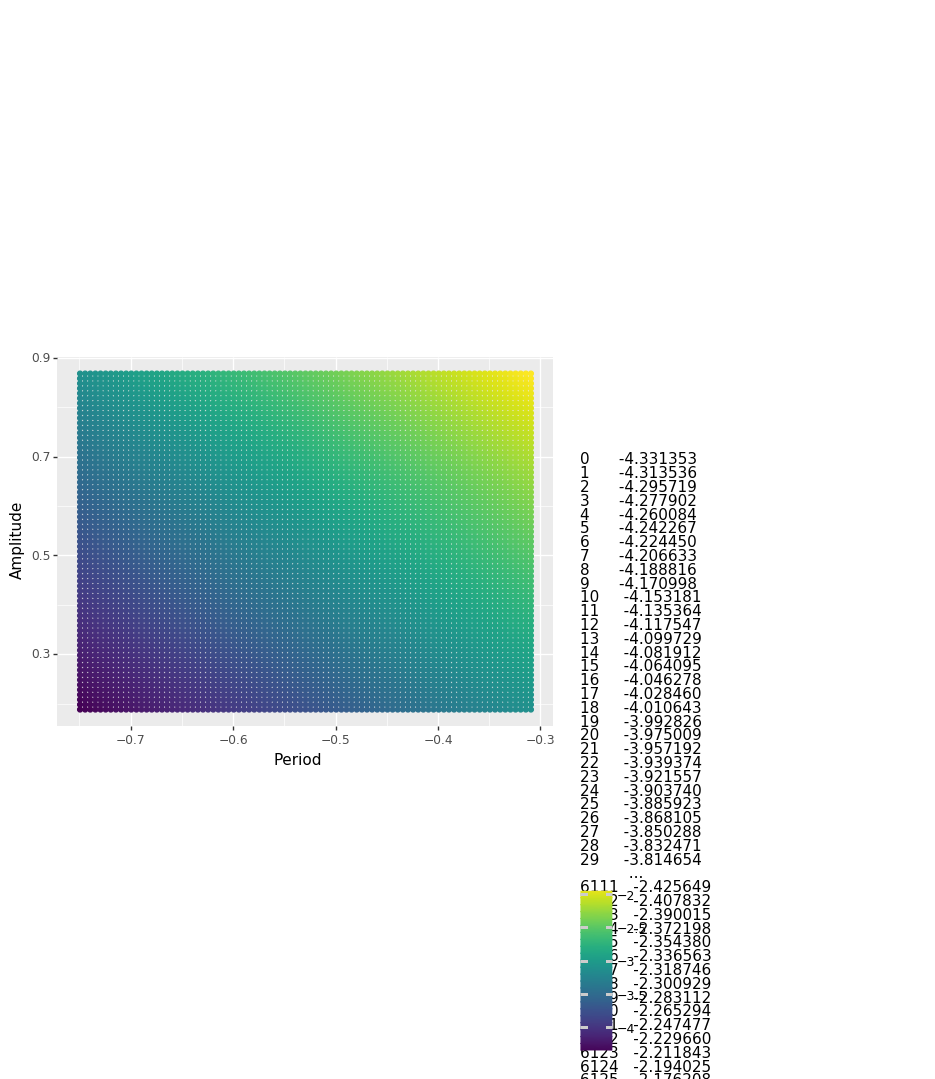

<ggplot: (-9223363249789143338)>

In [116]:
ggplot(line) +\
    geom_point(aes(x = line[LOGP], y = line[AMPLITUDE], color = line["result"])) +\
    xlab("Period") +\
    ylab("Amplitude")

In [117]:
svc.coef_.T

array([[ 2.75189097],
       [ 1.78172326]])

In [144]:
X6 = line.as_matrix(["scale_logp", "scale_amp"])
X6

array([[-3.0156511 , -2.28661855],
       [-3.0156511 , -2.21501403],
       [-3.0156511 , -2.14340952],
       ..., 
       [ 2.80576377,  2.43927937],
       [ 2.80576377,  2.51088389],
       [ 2.80576377,  2.5824884 ]])

In [145]:
a = np.array([np.array([r[0] * 2.75189097 + r[1] * 1.78172326]) for r in X6]) + svc.intercept_
a

array([[-14.97718495],
       [-14.84960552],
       [-14.72202609],
       ..., 
       [  9.46295631],
       [  9.59053574],
       [  9.71811517]])

In [146]:
b = np.dot(X6, svc.coef_.T) + svc.intercept_
b

array([[-14.97718497],
       [-14.84960554],
       [-14.72202611],
       ..., 
       [  9.46295633],
       [  9.59053576],
       [  9.71811518]])

In [147]:
b.argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0])